## エネルギーと磁化、自己相関関数（L=10)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
np.linspace(2.27, 2.63, 19)

array([2.27, 2.29, 2.31, 2.33, 2.35, 2.37, 2.39, 2.41, 2.43, 2.45, 2.47,
       2.49, 2.51, 2.53, 2.55, 2.57, 2.59, 2.61, 2.63])

In [15]:
datas = []
energies = []
mags = []
for i in [2.27, 2.29, 2.31, 2.33, 2.35, 2.37, 2.39, 2.41, 2.43, 2.45, 2.47,2.49, 2.51, 2.53, 2.55, 2.57, 2.59, 2.61, 2.63]:
    for j in [2021, 2022, 2023, 2025, 2026]:
        data  += np.loadtxt(f"../output/L10/Energy_Magnetization_L10_T{i}_{j}.dat")
    data /= 5
    energy = data[:, 0]
    mag = data[:, 1]
    datas.append(data)
    energies.append(energy)
    mags.append(mag)

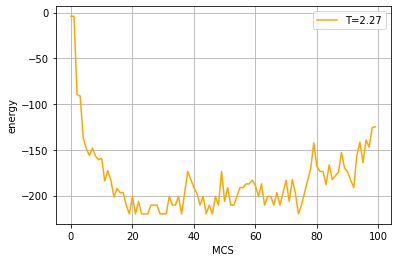

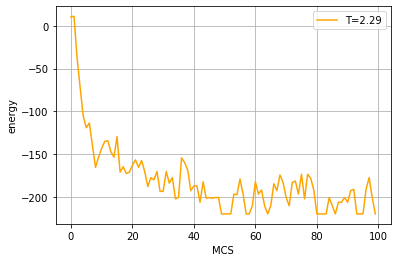

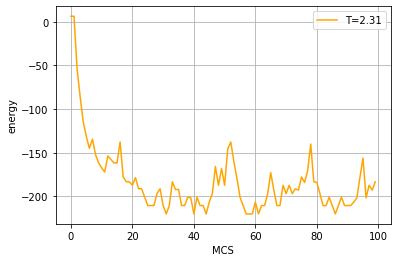

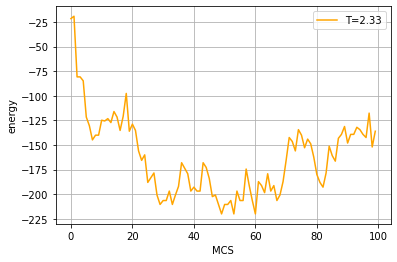

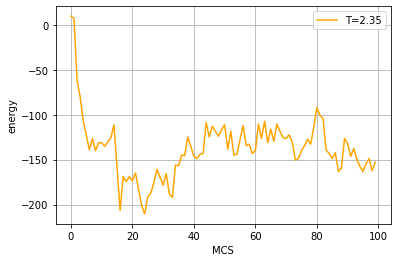

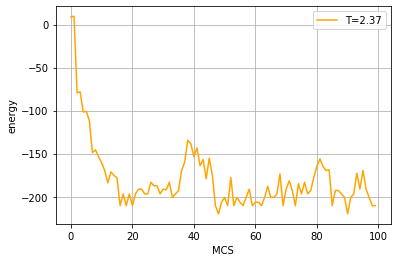

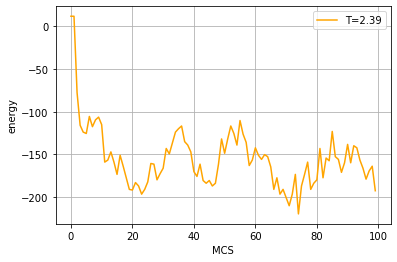

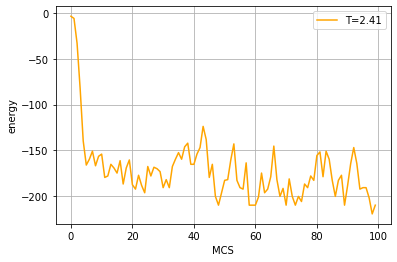

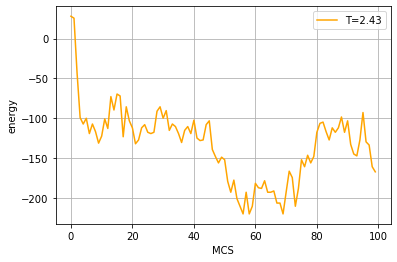

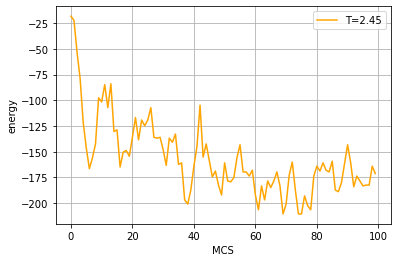

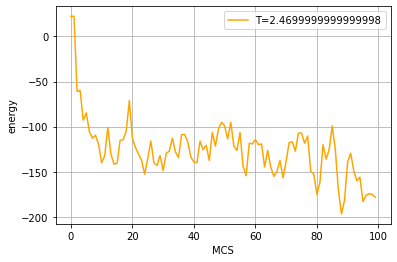

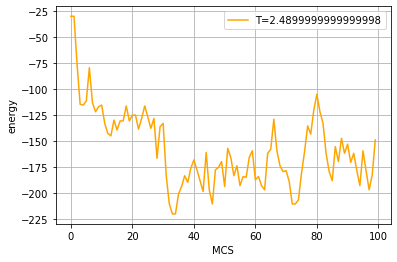

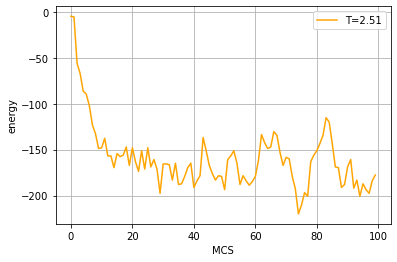

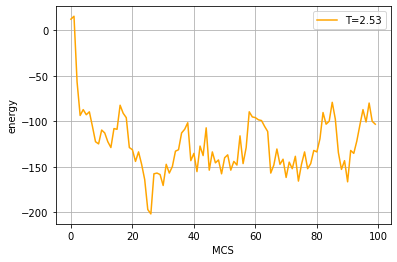

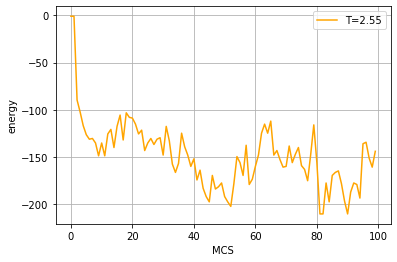

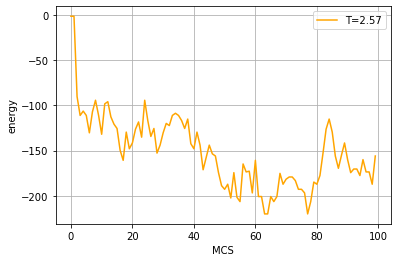

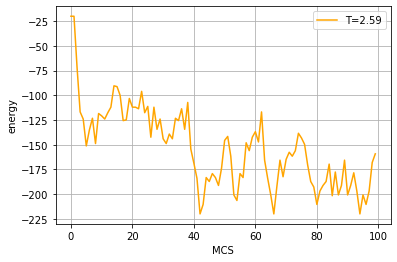

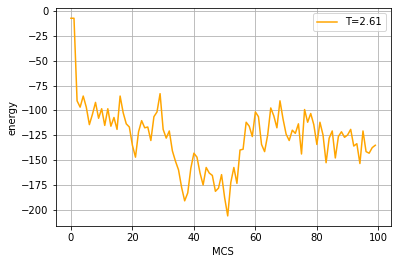

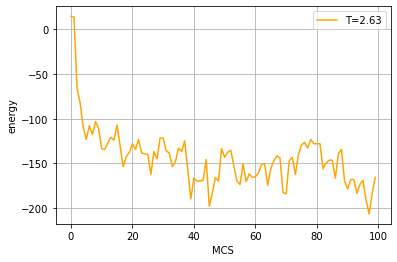

In [22]:
for energy , i in zip(energies, np.linspace(2.27, 2.63, 19)):
    plt.plot((energy[:100]), color='orange', label= f"T={i}")
    plt.legend()
    plt.xlabel('MCS')
    plt.ylabel('energy')
    plt.grid()
    plt.show()

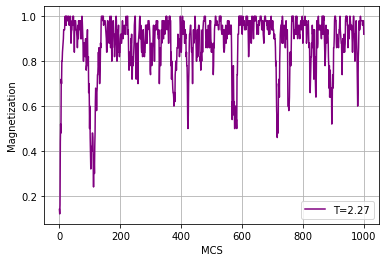

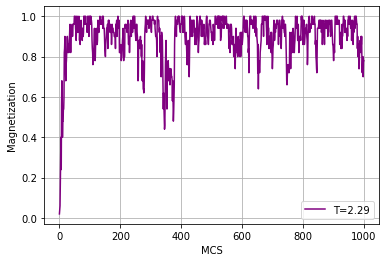

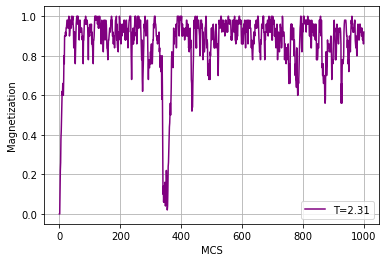

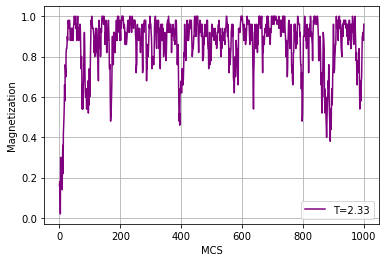

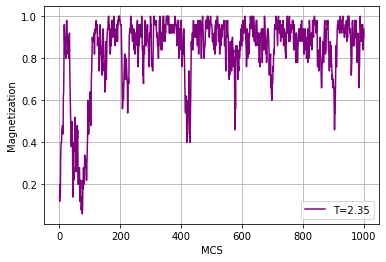

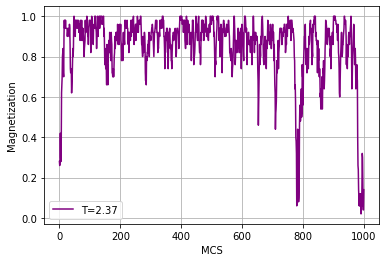

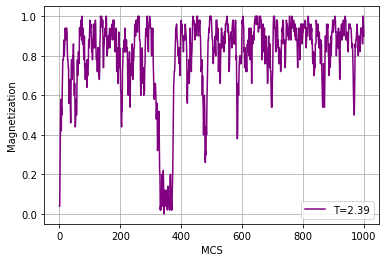

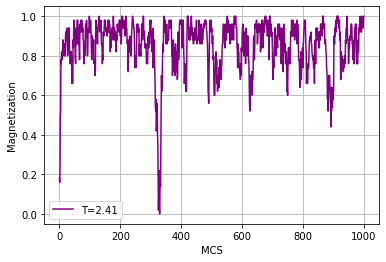

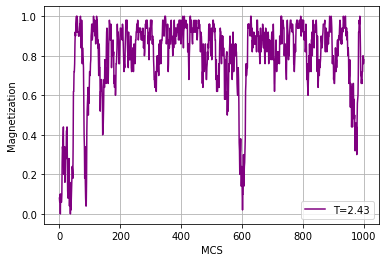

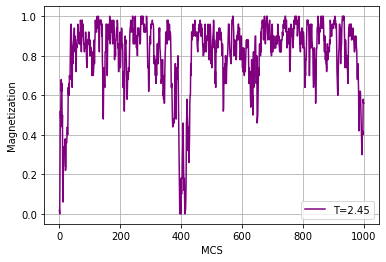

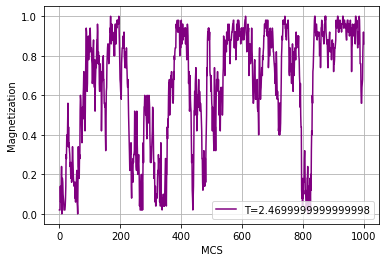

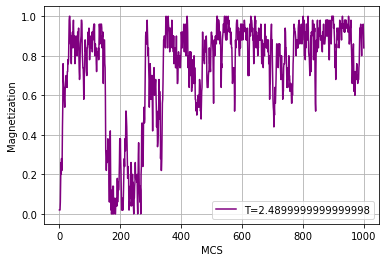

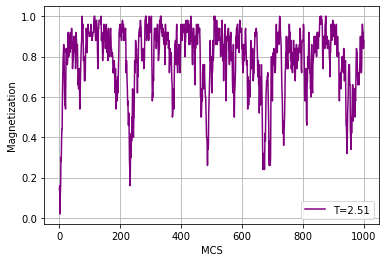

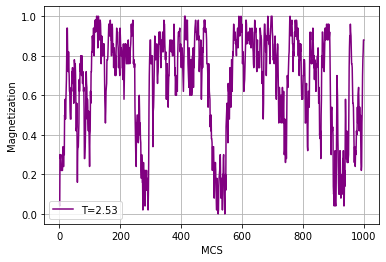

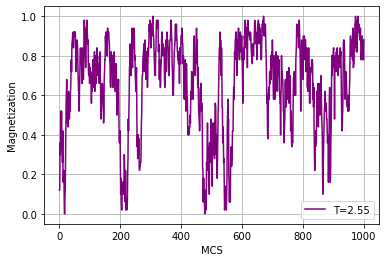

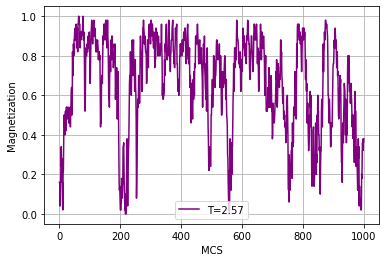

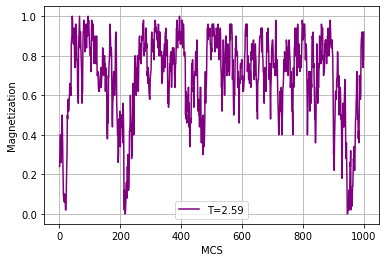

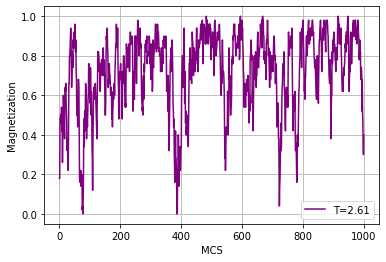

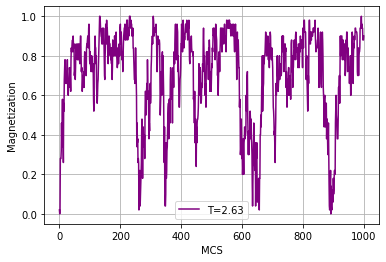

In [24]:
for mag, i in zip(mags, np.linspace(2.27, 2.63, 19)):
    plt.plot(np.abs(mag[:1000]), label=f"T={i}", color='purple')
    plt.legend()
    plt.xlabel('MCS')
    plt.ylabel('Magnetization')
    plt.grid()
    plt.show()

[441.07394697 332.3393015  264.30025687 218.26864707 184.72290961
 158.98474763 138.99125699 123.15326659 109.60006411  97.72813891]


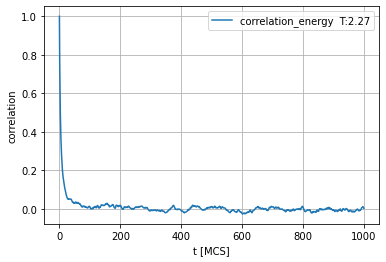

[450.61667168 336.83717279 265.29028372 216.82958627 181.50502019
 154.26481478 133.12858155 116.9092644  102.87724301  91.10942513]


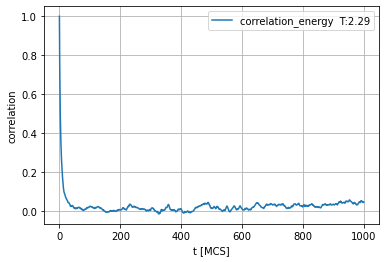

[499.42553741 380.88811705 306.00169604 254.34387286 215.84862372
 184.03533537 158.2973736  138.64154635 122.37288245 106.66443237]


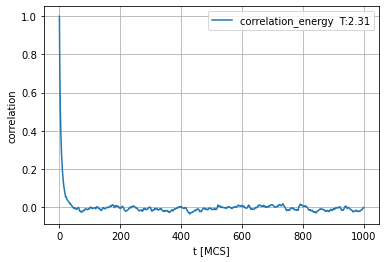

[545.1986523  422.09371719 345.05748525 290.37331198 248.74690645
 216.61997736 189.48245439 167.3765368  150.0021077  133.83254192]


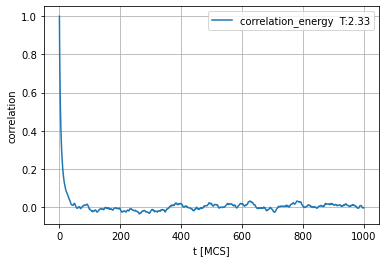

[567.55915623 441.05966557 359.54077456 303.55620203 260.51412245
 227.99693621 201.24858671 179.5543326  161.40485768 146.55007191]


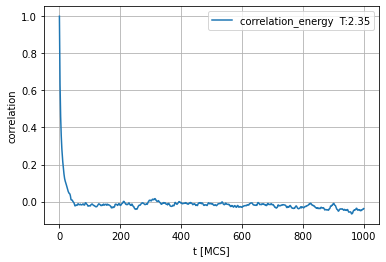

[604.05956586 475.41299475 392.77230968 337.58553573 295.84216945
 259.62821895 229.63196699 205.82384199 185.74893738 168.54563711]


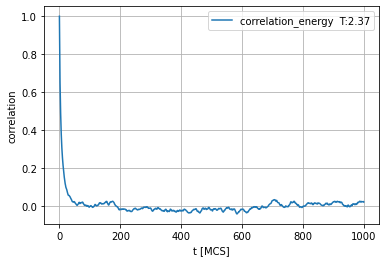

[643.47223374 510.84385188 427.17647256 367.63785145 321.43755834
 285.45897651 256.67674903 233.504948   213.37853402 195.38268736]


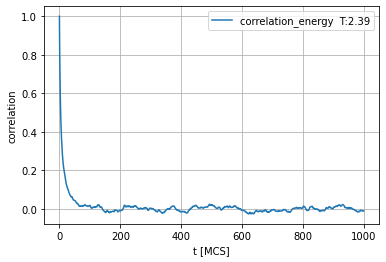

[690.18993959 551.36263182 464.50948595 402.07049151 354.47801886
 316.64710465 286.77361918 261.92499486 238.36456061 217.48733096]


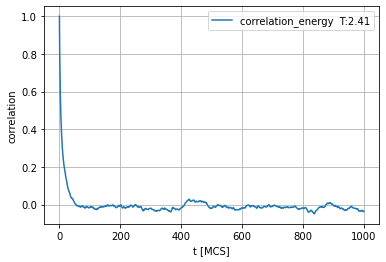

[714.39201038 576.11674569 487.15459285 422.79233728 374.20359221
 335.05162626 303.96910743 277.46085477 253.07501913 233.48211368]


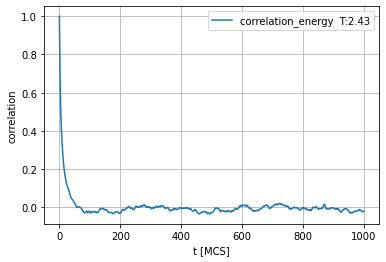

[754.14412511 611.438631   517.711097   449.30450739 397.58587938
 355.92214181 322.26118181 295.40641173 271.04529174 249.50383751]


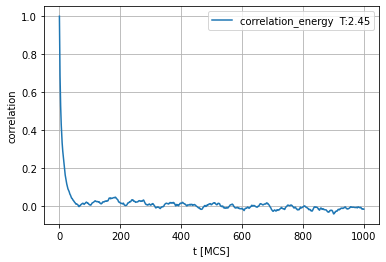

[806.5736299  660.56009658 568.42622493 502.09544704 451.0282181
 408.34291916 373.02234785 341.9906109  313.34550324 289.40442964]


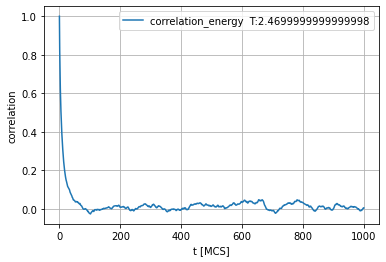

[823.96207892 673.77147657 576.24550751 506.13611376 452.90894285
 409.32196883 372.15272032 340.79388826 313.10530598 289.19632612]


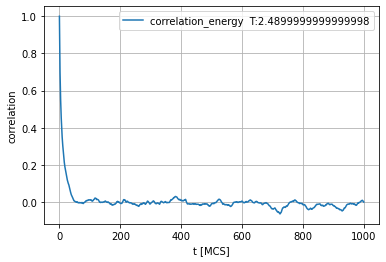

[880.60250269 728.07400036 632.13126195 562.34309685 508.67577754
 464.91033975 428.20022804 396.17573772 369.01954998 344.85969062]


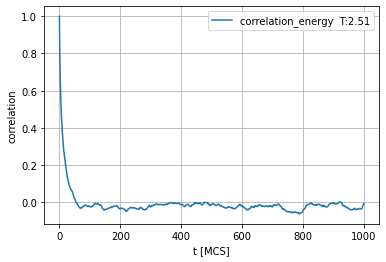

[881.46626949 724.66882175 626.26494153 555.84106802 501.338409
 457.38384322 420.77242389 389.55935458 361.35715679 337.65116066]


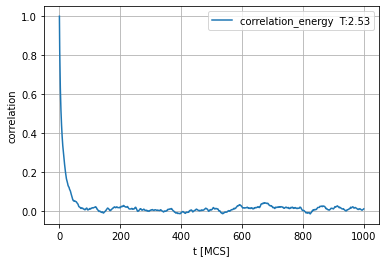

[965.61585953 807.18702744 707.97700707 634.89082249 578.40390225
 530.15743914 491.2959388  458.591263   431.29169572 405.26237395]


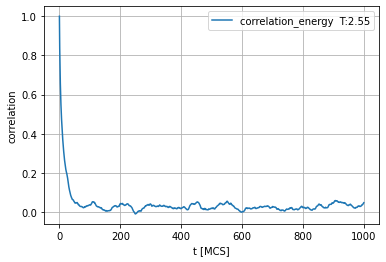

[933.98521711 771.53765156 668.73644071 593.93070429 535.47046949
 489.07356957 450.60032597 417.31454108 385.44260869 359.2356339 ]


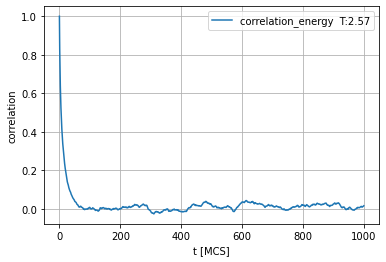

[927.6636622  763.52221677 659.07079917 586.56521216 528.23916833
 480.72346388 440.22587412 404.01950868 372.23950199 342.9772565 ]


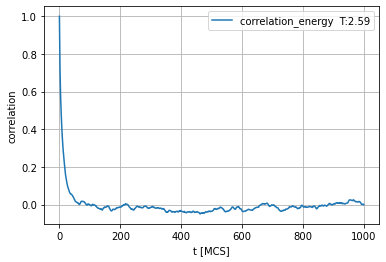

[966.66109863 801.88885399 700.30813498 626.79986074 566.49832691
 519.69214326 480.05541989 444.8582368  413.70535674 385.10298029]


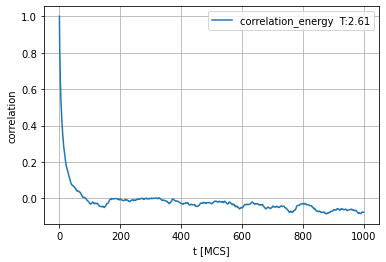

[951.20803348 780.91647562 677.01989244 602.45517921 542.4184632
 495.2331901  456.62497663 425.38777853 396.70868447 371.09894691]


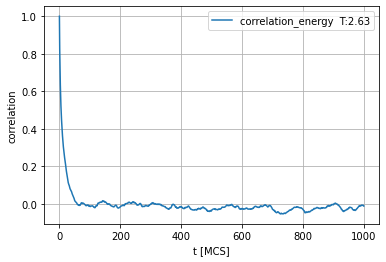

In [25]:
Correlations = []
for i, energy , T in zip(range(20), energies,np.linspace(2.27, 2.63, 19)):
    energy_ = energy[400:]
    sum2 = (np.mean(energy_))**2
    C = np.zeros(1000)
    for t in range(1000):
        sum1 = 0
        N = 49500
        for t_ in range(N - t):
            sum1 += ( energy_[t_] * energy_[t_ + t])
        C[t] = (sum1 / (N-t)) - sum2
    Correlations.append(C)
       
    
    print(C[:10])
    plt.plot(C/C[0] , color='orange', label=f"correlation_energy  T:{T}")
    plt.legend()
    plt.xlabel('t [MCS]')
    plt.ylabel('correlation')
    plt.grid()
    plt.show()

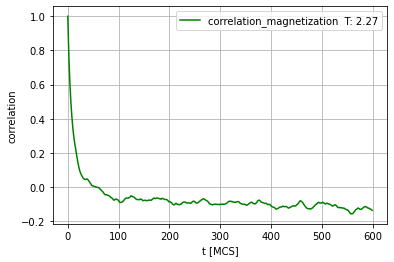

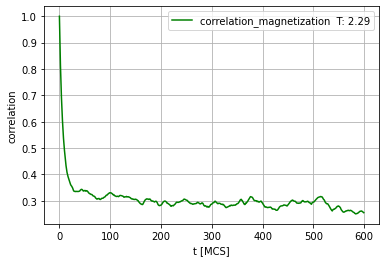

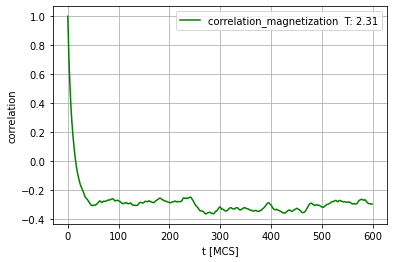

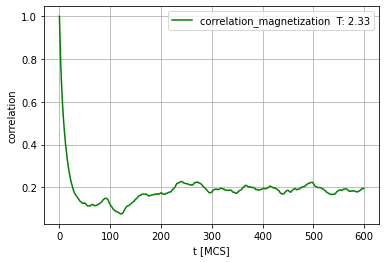

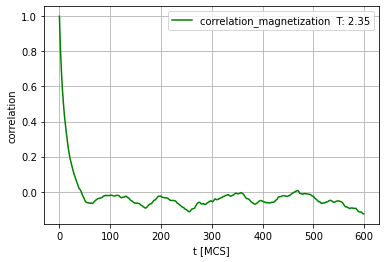

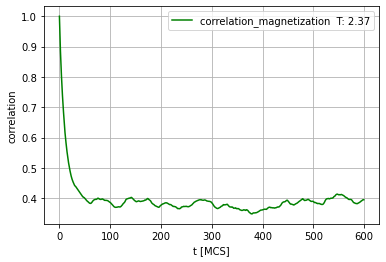

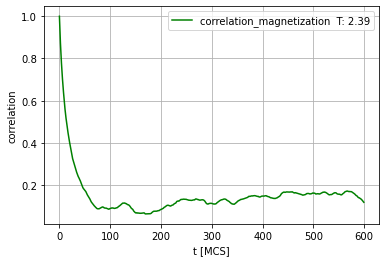

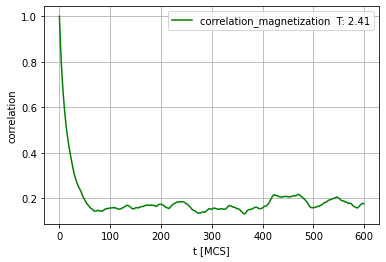

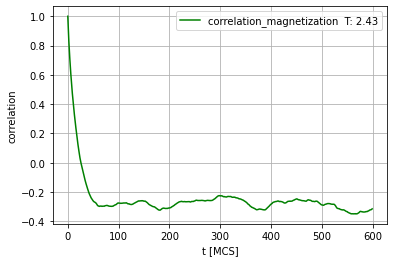

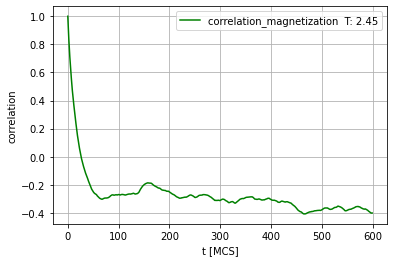

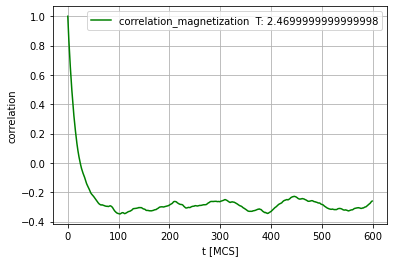

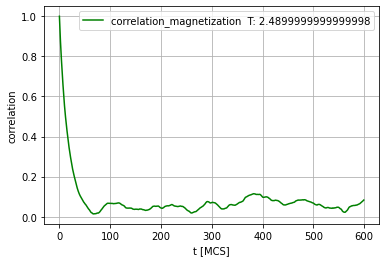

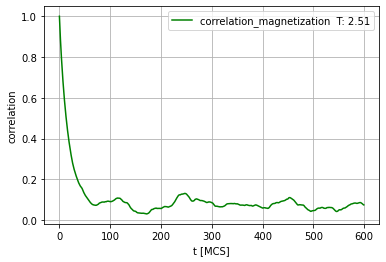

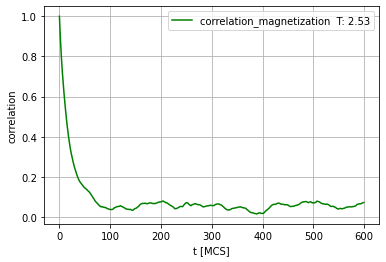

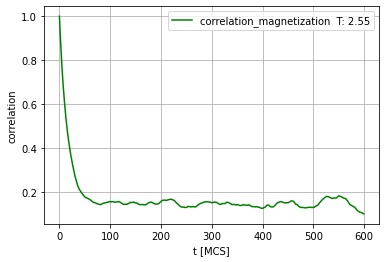

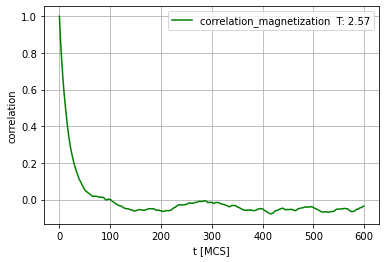

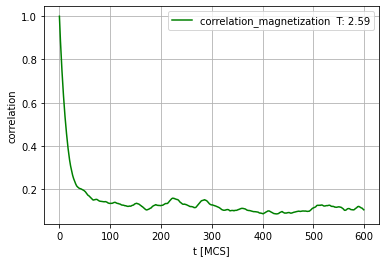

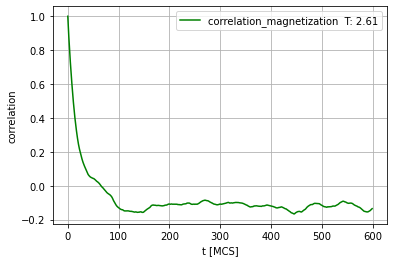

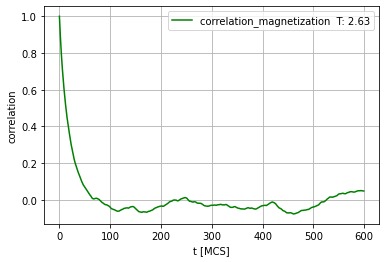

In [28]:
Correlation_mags = []
for i, mag, T in zip(range(20), mags,np.linspace(2.27, 2.63, 19)):
    mag_ = mag[400:]
    C = np.zeros(2500)
    sum2 = (np.mean(mag_))**2
    for t in range(2500):
        sum1 = 0
        N = 25000
        for t_ in range(N-t):
            sum1 += mag_[t_] * mag_[t_ + t]
        C[t] = (sum1 / (N-t)) - sum2
    Correlation_mags.append(C)
    
    plt.plot(C[:600]/C[0], label=f"correlation_magnetization  T: {T}", color='green')
    plt.legend()
    plt.xlabel('t [MCS]')
    plt.ylabel('correlation')
    plt.grid()
    plt.show()

## L=40

In [30]:
datas_40 = []
energies_40 = []
mags_40 = []
for i in [2.27, 2.29, 2.31, 2.33, 2.35, 2.37, 2.39, 2.41, 2.43, 2.45, 2.47,2.49, 2.51, 2.53, 2.55, 2.57, 2.59, 2.61, 2.63]:
    data_40  = np.loadtxt(f"../output/L40/Energy_Magnetization_L40_T{i}_2026.dat")
    energy_40 = data_40[:, 0]
    mag_40 = data_40[:, 1]
    datas_40.append(data_40)
    energies_40.append(energy_40)
    mags_40.append(mag_40)

[7627.4143511  5893.76727705 4795.75636907 4028.85813411 3484.01655271
 3080.4092501  2780.21004689 2528.26429216 2336.76748477 2166.75384418]


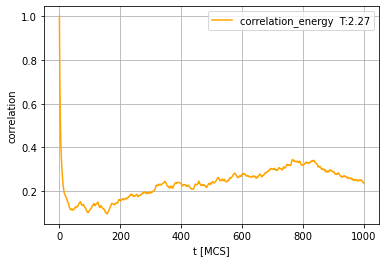

[8096.84714063 6294.68181048 5160.82090909 4351.01999613 3739.35595562
 3252.35042262 2867.22637649 2578.48044268 2343.7853701  2143.66440063]


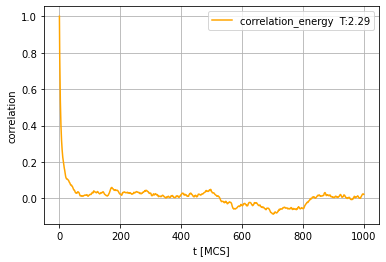

[9001.73511758 7165.55866111 5999.26910993 5208.71716677 4634.35540984
 4198.48912427 3837.51397123 3540.20731523 3306.67712624 3109.14235264]


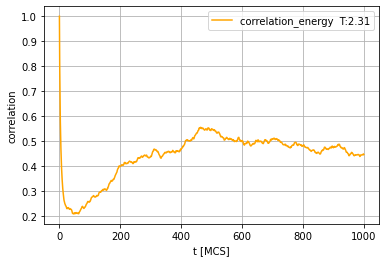

[8580.65030972 6620.56344249 5405.63026035 4533.02067869 3873.49145385
 3365.96074806 2959.91104567 2643.32452024 2382.849459   2178.58160814]


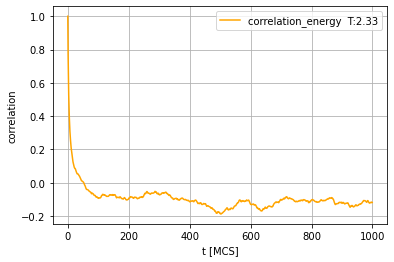

[9293.3051182  7279.77430524 6035.28071827 5169.26682865 4519.13855351
 4009.20228588 3596.41826738 3261.55905024 2950.34832641 2697.98133559]


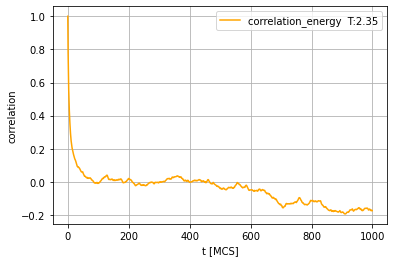

[11544.48786545  9508.8801274   8228.40387066  7328.69060173
  6625.48901732  6053.80718708  5578.72827751  5166.61669353
  4838.34721925  4562.6266728 ]


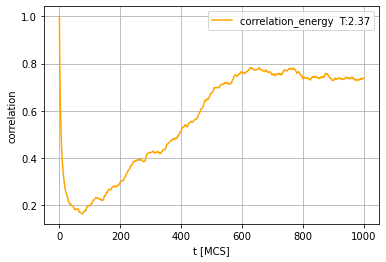

[12338.23089545 10211.46346494  8884.73489962  7929.60013228
  7184.481401    6600.83278229  6138.44061742  5752.12128442
  5401.20930276  5102.20128636]


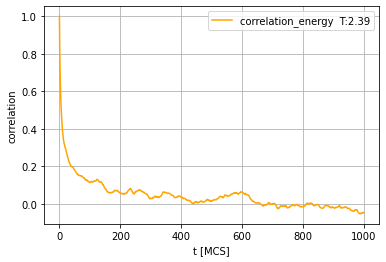

[12853.53371964 10684.18014888  9320.18597067  8357.49758179
  7608.28358245  7002.89076197  6546.3525504   6150.92128917
  5814.87923039  5535.55164984]


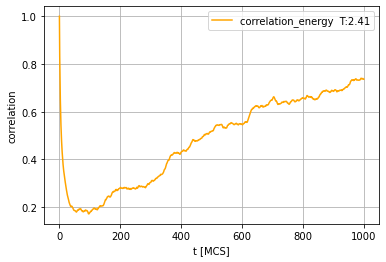

[16162.37635913 13935.16107563 12528.51458045 11540.91705212
 10775.95547345 10157.84512406  9622.63597359  9186.80692087
  8827.33693462  8484.28841171]


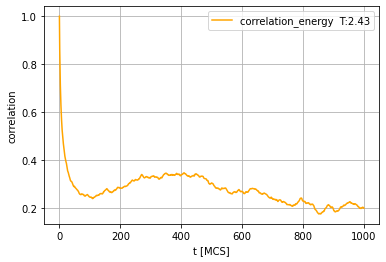

[19107.62996798 16870.29490249 15481.05720286 14456.03796814
 13677.65042988 13017.01563149 12477.1718723  12059.81483875
 11704.98710293 11371.10611114]


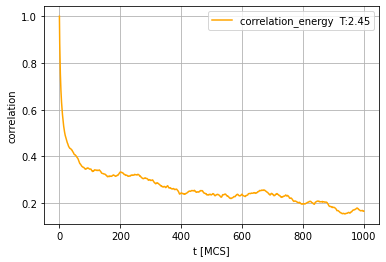

[19324.06557105 16991.00759751 15547.85714901 14495.37142001
 13680.78519616 13010.67130673 12458.66255355 12003.2731618
 11618.29835565 11304.1773977 ]


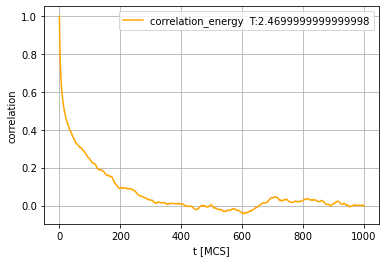

[19694.11712254 17321.27621421 15859.10164544 14844.40694766
 14067.09787876 13401.95516081 12839.85639231 12367.72108469
 11963.84776141 11632.04507575]


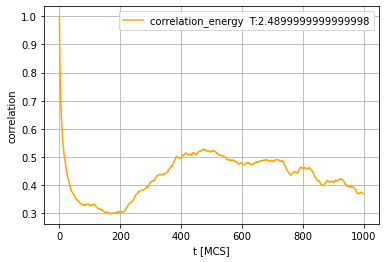

[21925.72050038 19523.10071098 18057.67209139 17008.97737682
 16216.30956816 15575.34021041 15053.9441338  14609.52722608
 14235.35015282 13881.94120572]


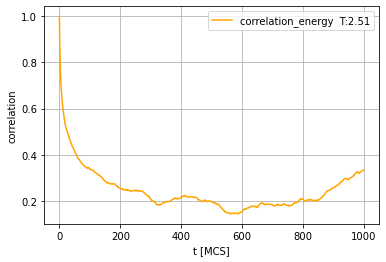

[22066.36598056 19624.34205554 18124.26803943 17073.12164344
 16277.42920152 15623.49537545 15074.65206649 14648.04494108
 14290.16719552 13961.30839075]


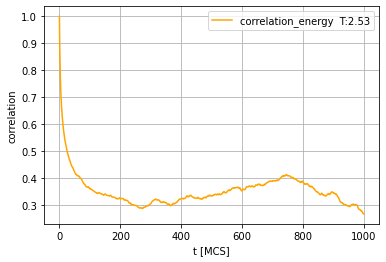

[24605.41532716 22153.29768086 20662.44435234 19597.84391623
 18811.0764476  18169.65278313 17625.76035932 17171.28187404
 16780.31549754 16462.40338267]


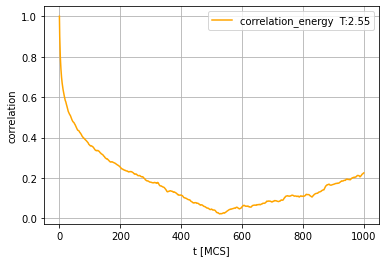

[20435.83192721 17919.63580968 16473.35532683 15432.07043559
 14672.14304868 14015.35503631 13505.72812189 13091.01378319
 12711.25908905 12334.83447778]


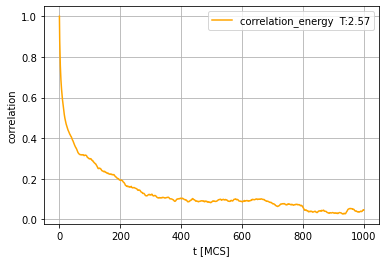

[18395.82096429 15886.68615954 14400.4679779  13360.53117661
 12618.58363277 11987.13005446 11505.53918223 11081.24176515
 10694.79983432 10370.06366651]


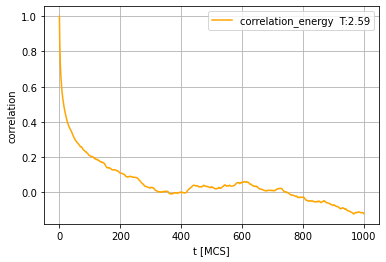

[16120.06985526 13582.45331576 12067.8101612  11047.48679155
 10285.2634573   9660.32773341  9149.27026968  8712.54262477
  8343.14825365  8036.39653376]


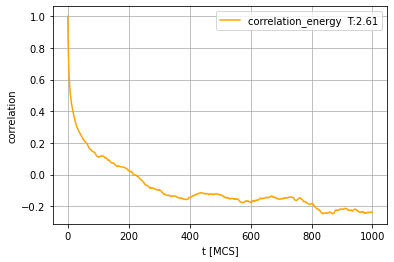

[14639.34491062 12037.48975054 10524.08642554  9473.01679656
  8655.87570681  7987.4712434   7476.00004853  7070.3845103
  6710.15465316  6383.82078569]


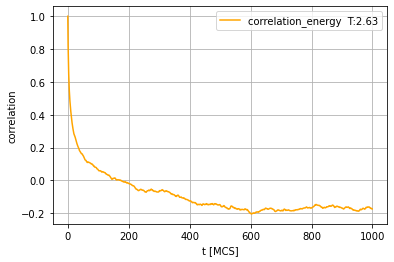

In [33]:
Correlations = []
for i, energy , T in zip(range(20), energies_40,np.linspace(2.27, 2.63, 19)):
    energy_ = energy[400:]
    sum2 = (np.mean(energy_))**2
    C = np.zeros(1000)
    for t in range(1000):
        sum1 = 0
        N = 49500
        for t_ in range(N - t):
            sum1 += ( energy_[t_] * energy_[t_ + t])
        C[t] = (sum1 / (N-t)) - sum2
    Correlations.append(C)
       
    
    print(C[:10])
    plt.plot(C/C[0] , color='orange', label=f"correlation_energy  T:{T}")
    plt.legend()
    plt.xlabel('t [MCS]')
    plt.ylabel('correlation')
    plt.grid()
    plt.show()

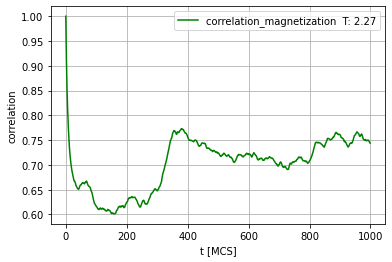

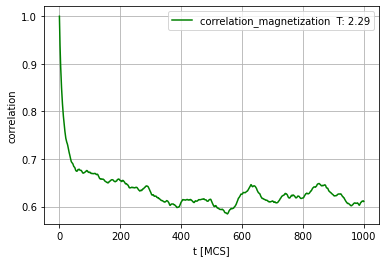

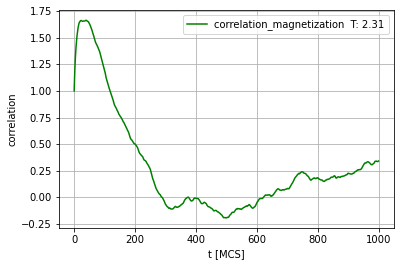

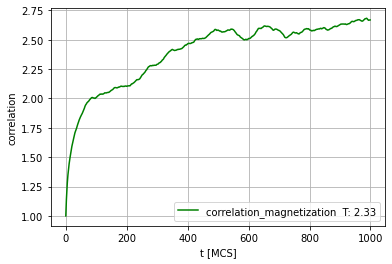

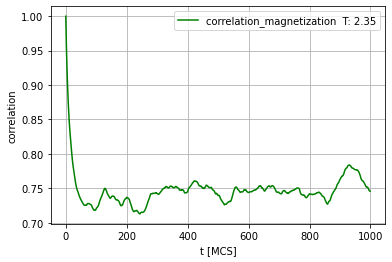

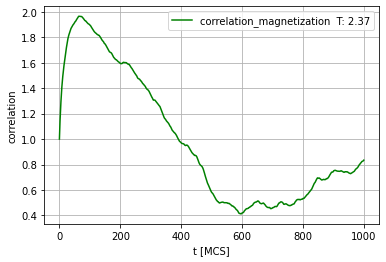

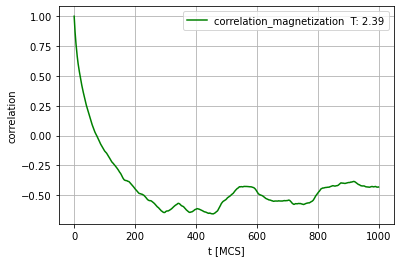

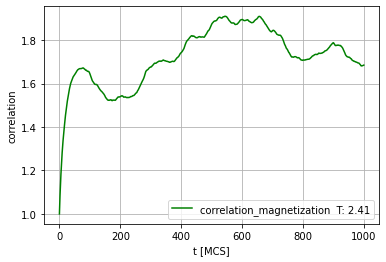

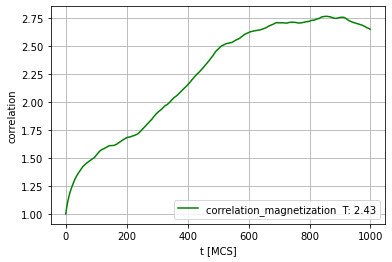

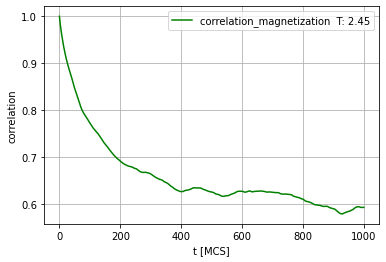

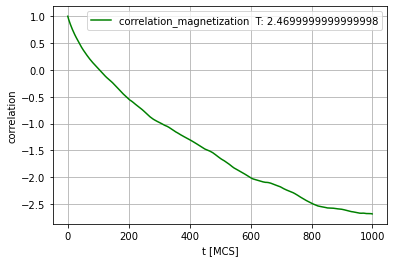

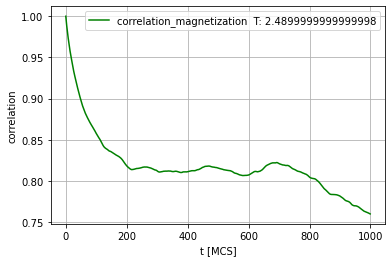

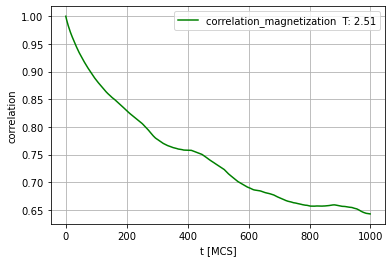

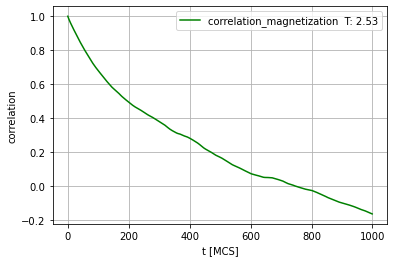

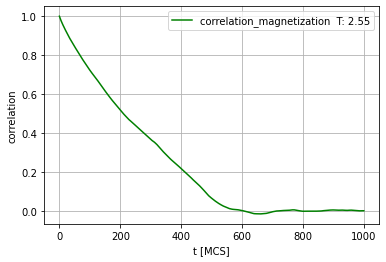

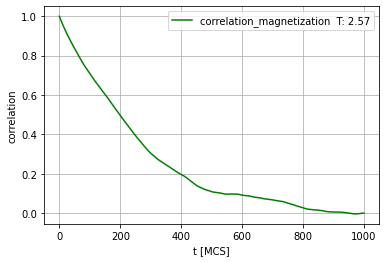

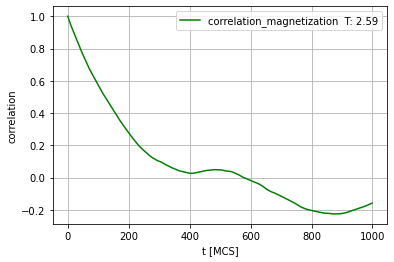

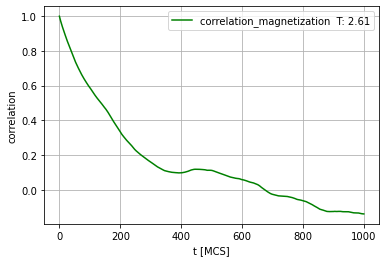

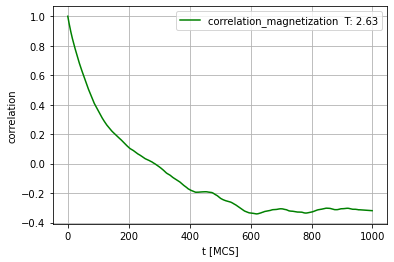

In [36]:
Correlation_mags_40 = []
for i, mag, T in zip(range(20), mags_40,np.linspace(2.27, 2.63, 19)):
    mag_ = mag[400:]
    C = np.zeros(2500)
    sum2 = (np.mean(mag_))**2
    for t in range(2500):
        sum1 = 0
        N = 
        for t_ in range(N-t):
            sum1 += mag_[t_] * mag_[t_ + t]
        C[t] = (sum1 / (N-t)) - sum2
    Correlation_mags_40.append(C)
    
    plt.plot(C[:1000]/C[0], label=f"correlation_magnetization  T: {T}", color='green')
    plt.legend()
    plt.xlabel('t [MCS]')
    plt.ylabel('correlation')
    plt.grid()
    plt.show()

In [1]:
mag_.shape

NameError: name 'mag_' is not defined

In [2]:
mag_

NameError: name 'mag_' is not defined